In [2]:
import warnings
import pandas as pd
import pycountry
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
# import wbdata

AttributeError: module 'matplotlib' has no attribute 'get_data_path'

In [2]:
def get_country_name_from_iso(iso_code):
        try:
            country = pycountry.countries.get(alpha_3=iso_code.upper())
            if country:
                return country.name
            else:
                return "country not found"
        except AttributeError:
            return "invalid ISO code"

In [3]:
def line_plot(dataframe, indicator_code):
    """
    function creates a line plot of time series data
    parameters:
        - dataframe, which is the time series data previously read in
        - indicator_code, needs to be a string name of the indicator code you are plotting
    """
    def get_country_name_from_iso(iso_code):
        try:
            country = pycountry.countries.get(alpha_3 = iso_code.upper())
            if country:
                return country.name
            else:
                return "country not found"
        except AttributeError:
            return "invalid ISO code"

    dataframe['CountryName'] = dataframe['CountryCode'].apply(get_country_name_from_iso)
    data_pivoted = dataframe.pivot(index= 'CountryName', columns = 'Year', values = 'Score')
    data_pivoted.reset_index

    sspi_countries = np.array(['Argentina', 'Australia', 'Austria', 'Belgium','Brazil','Canada','Chile','China','Colombia','Czechia',
    'Denmark','Estonia','Finland','France','Germany','Greece','Hungary','Iceland','India','Indonesia','Ireland','Israel','Italy','Japan',
    'Korea, Republic of','Kuwait','Latvia','Lithuania','Luxembourg','Mexico','Netherlands','New Zealand','Norway','Poland','Portugal','Russian Federation',
    'Saudi Arabia','Singapore','Slovakia','Slovenia','South Africa','Spain','Sweden','Switzerland','Türkiye','United Arab Emirates',
    'United Kingdom','United States','Uruguay'])

    sspi_countries_filtered = []
    countries_not_found = []
    for country in sspi_countries:
        if country in data_pivoted.index:
            sspi_countries_filtered.append(country)
        else:
            countries_not_found.append(country)
    
    for country in sspi_countries:
        if country in data_pivoted.index:
            plt.plot(data_pivoted.columns, data_pivoted.loc[country], label = country)

    plt.title(indicator_code + " Score throughout time")
    plt.xlabel('Time')
    plt.ylabel(indicator_code + 'Score')
    plt.legend(title = 'Country', bbox_to_anchor=(1.05,1), loc='upper left')
    plt.grid(True)
    plt.show()

   # Print countries not found in the index
    if countries_not_found:
        print("Countries in sspi_countries but not found in the DataFrame's index:")
        print(countries_not_found)

In [4]:
def top_10(dataframe, indicator_code):
    """
    function creates a line plot of time series data
    parameters:
        - dataframe, which is the time series data previously read in
        - indicator_code, needs to be a string name of the indicator code you are plotting
    """
    def get_country_name_from_iso(iso_code):
        try:
            country = pycountry.countries.get(alpha_3=iso_code.upper())
            if country:
                return country.name
            else:
                return "country not found"
        except AttributeError:
            return "invalid ISO code"

    dataframe['CountryName'] = dataframe['CountryCode'].apply(get_country_name_from_iso)
    data_pivoted = dataframe.pivot(index='CountryName', columns='Year', values='Score')

    sspi_countries = np.array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile', 'China', 'Colombia', 'Czechia',
                               'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan',
                               'Korea, Republic of', 'Kuwait', 'Latvia', 'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Russian Federation',
                               'Saudi Arabia', 'Singapore', 'Slovakia', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Türkiye', 'United Arab Emirates',
                               'United Kingdom', 'United States', 'Uruguay'])

    # Filter out countries not present in the DataFrame's index
    sspi_countries_filtered = []
    countries_not_found = []
    for country in sspi_countries:
        if country in data_pivoted.index:
            sspi_countries_filtered.append(country)
        else:
            countries_not_found.append(country)

    mean_values_subset = data_pivoted.loc[sspi_countries_filtered].mean(axis=1)
    sorted_countries_descending = mean_values_subset.sort_values(ascending=False)
    top_10_countries_subset = sorted_countries_descending.head(10)

    for country in top_10_countries_subset.index:
        plt.plot(data_pivoted.columns, data_pivoted.loc[country], label=country)

    plt.title(indicator_code + " Score throughout time (top 10 mean value)")
    plt.xlabel('Time')
    plt.ylabel(indicator_code + ' Score')
    plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

    # Print countries not found in the index
    if countries_not_found:
        print("Countries in sspi_countries but not found in the DataFrame's index:")
        print(countries_not_found)

In [5]:
def bottom_10(dataframe, indicator_code):
    """
    function creates a line plot of time series data
    parameters:
        - dataframe, which is the time series data previously read in
        - indicator_code, needs to be a string name of the indicator code you are plotting
    """
    def get_country_name_from_iso(iso_code):
        try:
            country = pycountry.countries.get(alpha_3=iso_code.upper())
            if country:
                return country.name
            else:
                return "country not found"
        except AttributeError:
            return "invalid ISO code"

    dataframe['CountryName'] = dataframe['CountryCode'].apply(get_country_name_from_iso)
    data_pivoted = dataframe.pivot(index='CountryName', columns='Year', values='Score')

    sspi_countries = np.array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile', 'China', 'Colombia', 'Czechia',
                               'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan',
                               'Korea, Republic of', 'Kuwait', 'Latvia', 'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Russian Federation',
                               'Saudi Arabia', 'Singapore', 'Slovakia', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Türkiye', 'United Arab Emirates',
                               'United Kingdom', 'United States', 'Uruguay'])

    # Filter out countries not present in the DataFrame's index
    sspi_countries_filtered = []
    countries_not_found = []
    for country in sspi_countries:
        if country in data_pivoted.index:
            sspi_countries_filtered.append(country)
        else:
            countries_not_found.append(country)

    mean_values_subset = data_pivoted.loc[sspi_countries_filtered].mean(axis=1)
    sorted_countries_descending = mean_values_subset.sort_values(ascending=True)
    top_10_countries_subset = sorted_countries_descending.head(10)

    for country in top_10_countries_subset.index:
        plt.plot(data_pivoted.columns, data_pivoted.loc[country], label=country)

    plt.title(indicator_code + " Score throughout time (bottom 10 mean value)")
    plt.xlabel('Time')
    plt.ylabel(indicator_code + ' Score')
    plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

    # Print countries not found in the index
    if countries_not_found:
        print("Countries in sspi_countries but not found in the DataFrame's index:")
        print(countries_not_found)

### PHYSPC, Physicians per 10,000

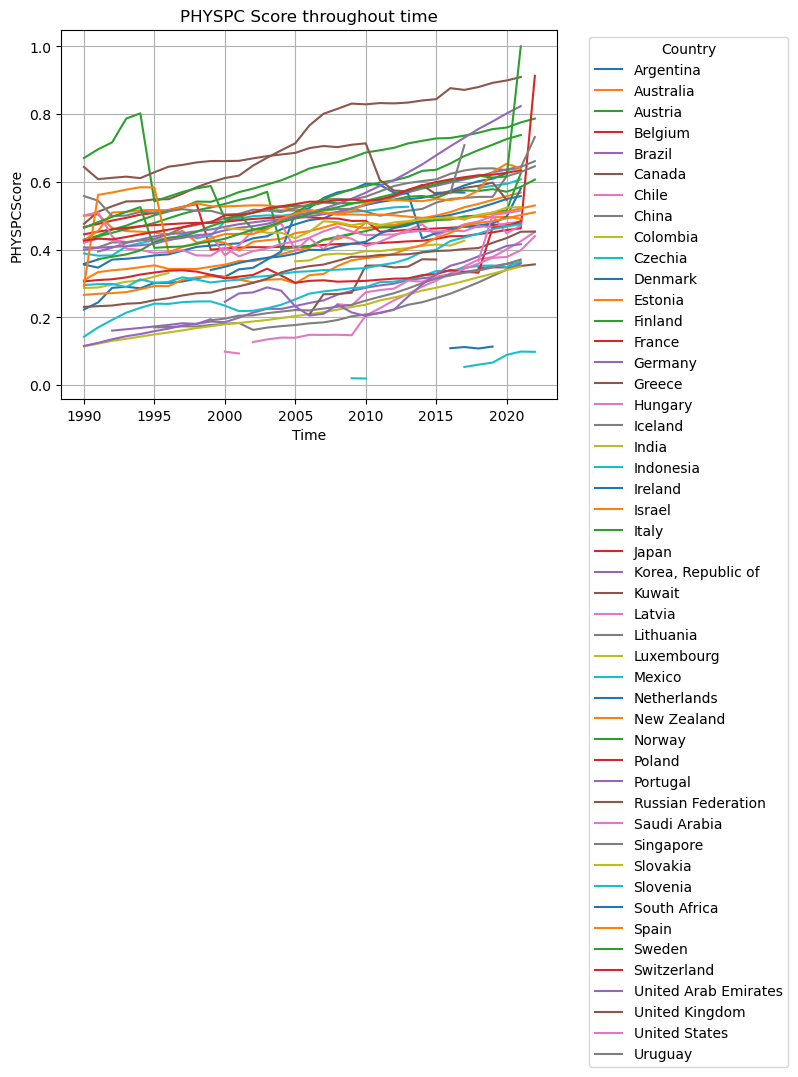

Countries in sspi_countries but not found in the DataFrame's index:
['Türkiye']


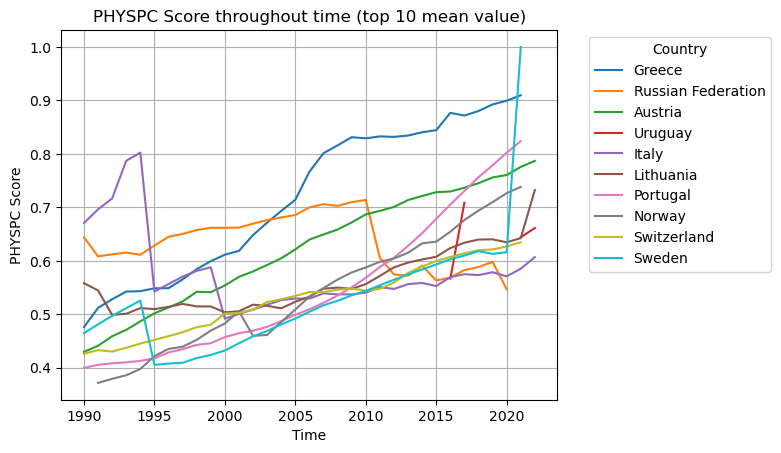

Countries in sspi_countries but not found in the DataFrame's index:
['Türkiye']


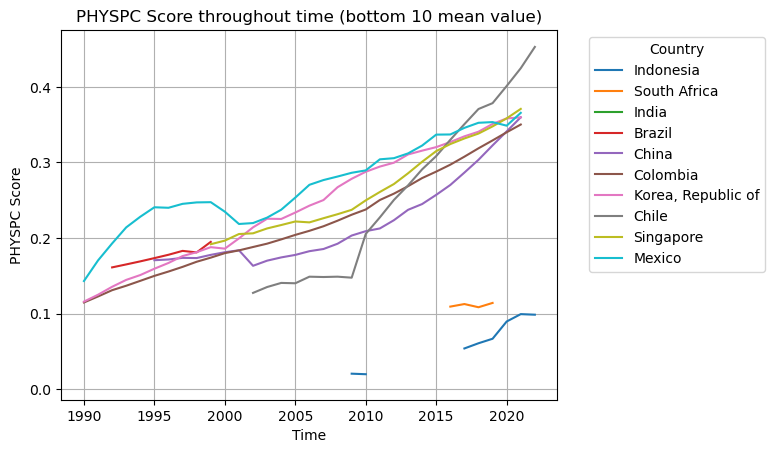

Countries in sspi_countries but not found in the DataFrame's index:
['Türkiye']


In [6]:
physicians = pd.read_json('PHYSPC.json')
line_plot(physicians, "PHYSPC")
top_10(physicians, "PHYSPC")
bottom_10(physicians, "PHYSPC")

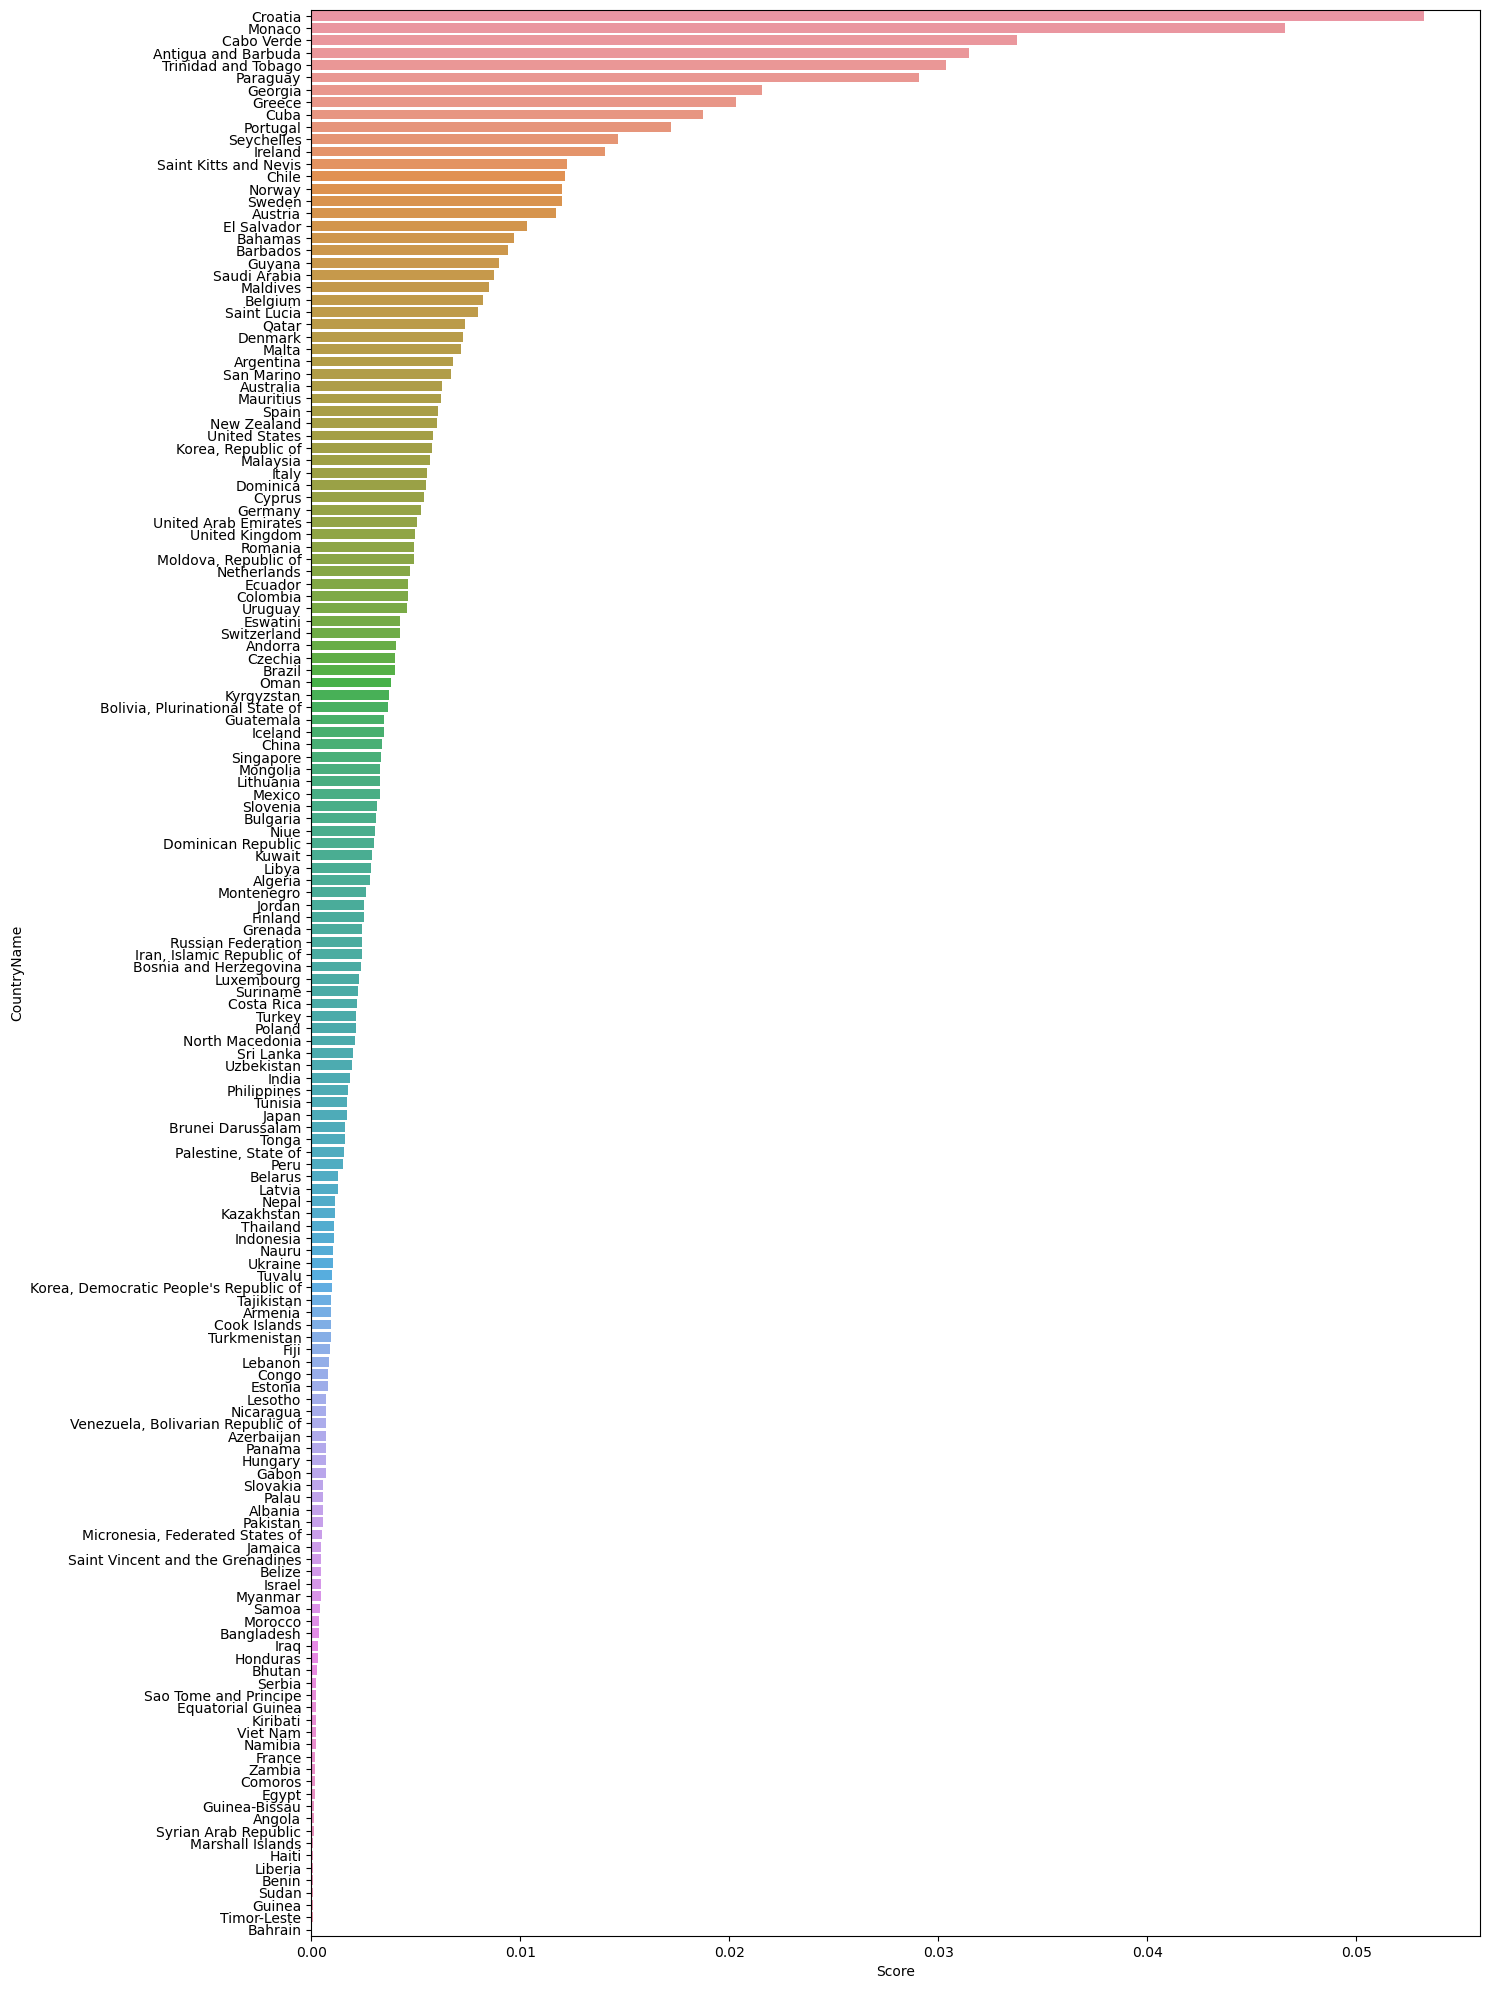

In [7]:
physicians = physicians.fillna(0)
physicians
country_var = physicians.groupby("CountryName")["Score"].agg(np.var).to_frame().sort_values("Score", ascending = False).reset_index()
country_var["NotZero"] = country_var["Score"].round(4).map(lambda score: score > 0)
country_var = country_var[country_var["NotZero"] == True]
country_var
plt.figure(figsize=(15,20))
var_plot = sns.barplot(country_var, y = "CountryName", x = "Score")
# var_plot.set_xticklabels(var_plot.get_xticklabels(), rotation = 40, ha = "right")
plt.tight_layout()
plt.show()

In [8]:
# wbdata.get_indicators(source = 40)
# pop = pd.DataFrame(wbdata.get_data("SP.POP.TOTL")).iloc[:, 2:5].dropna()
# pop["CountryName"] = pop["countryiso3code"].map(lambda iso: get_country_name_from_iso(iso))
# pop["date"], pop["value"] = pop["date"].astype(int), pop["value"].astype(int)
# pop_limited = pop[pop["date"] >= 1990]
# pop_var = pop_limited.groupby("countryiso3code")["value"].agg(np.var).to_frame().sort_values("value", ascending = False).head(50).reset_index()
# plt.figure(figsize=(15,20))
# var_plot = sns.barplot(pop_var, y = "countryiso3code", x = "value")
# plt.tight_layout()
# plt.show()

### Moving Averages

In [9]:
physicians.head(2)

,CountryCode,Description,IndicatorCode,LowerGoalpost,Score,Unit,UpperGoalpost,Value,Year,CountryName
0,BGR,"Number of medical doctors (physicians), both g...",PHYSPC,0,0.497771,Doctors/10000,70,34.844,2004,Bulgaria
1,GTM,"Number of medical doctors (physicians), both g...",PHYSPC,0,0.182886,Doctors/10000,70,12.802,2020,Guatemala


In [10]:
# def moving_average(data, periods):
#     grouped = physicians.groupby("CountryCode")[["CountryCode", "Value", "Year"]].head(5)
#     return grouped
# moving_average(physicians, 3)
phys_sorted = physicians.sort_values(["CountryCode", "Year"], ascending = True)
phys_sorted
def moving_average(data, years, periods = None, linearized = False):
    """
    Mutates a dataframe in place, creating a x-year moving average column.
    
    years = window length of moving average computation
    periods = the number of datapoints required in each moving-average window (<= years)
    linearized = interpolates missing data by linearizing between year before and after unknown period
    """
    df_list = []
    for code in data["CountryCode"].unique():
        filtered = data[data["CountryCode"] == code]
        if periods != None:
            if years < periods:
                return "Number of year-periods exceeds length of moving-average window"
            if linearized == True:
                all_years = pd.DataFrame({"Year": range(
                    filtered["Year"].min(), filtered["Year"].max())},)
                filtered = pd.merge(all_years, filtered, on = "Year", how = "left")
                for column in filtered.columns:
                    if column == "Score":
                        # assumes normalization technique is a linear transformation, which it is
                        filtered[column] = filtered[column].interpolate(method = "linear")
                    if column == "Value":
                        filtered[column] = filtered[column].interpolate(method = "linear")
                    else:
                        filtered[column] = filtered[column].ffill()
                filtered[f"linearized {years}-year moving average"] = filtered["Value"].rolling(
                    window = years, min_periods = periods).mean()
            else:
                all_years = pd.DataFrame({"Year": range(
                    filtered["Year"].min(), filtered["Year"].max())})
                filtered = pd.merge(all_years, filtered, on = "Year", how = "left")
                filtered[f"strict {years}-year moving average"] = filtered["Value"].rolling(
                    window = years, min_periods = periods).mean()
            filtered = filtered.dropna()
        else:
            filtered[f"{years}-year moving average"] = filtered["Value"].rolling(window = years).mean()
        df_list.append(filtered)
    return pd.concat(df_list)

In [11]:
sspi_countries = np.array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile', 'China', 'Colombia', 'Czechia',
                               'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan',
                               'Korea, Republic of', 'Kuwait', 'Latvia', 'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Russian Federation',
                               'Saudi Arabia', 'Singapore', 'Slovakia', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Türkiye', 'United Arab Emirates',
                               'United Kingdom', 'United States', 'Uruguay'])
def line_plot_adjusted(dataframe, indicator_code, value):
    """
    function creates a line plot of time series data
    parameters:
        - dataframe, which is the time series data previously read in
        - indicator_code, needs to be a string name of the indicator code you are plotting
        - value, string name of the numerical column you are attempting to plot
    """
    def get_country_name_from_iso(iso_code):
        try:
            country = pycountry.countries.get(alpha_3 = iso_code.upper())
            if country:
                return country.name
            else:
                return "country not found"
        except AttributeError:
            return "invalid ISO code"

    dataframe['CountryName'] = dataframe['CountryCode'].apply(get_country_name_from_iso)
    data_pivoted = dataframe.pivot(index= 'CountryName', columns = 'Year', values = value)
    data_pivoted.reset_index

    sspi_countries = np.array(['Argentina', 'Australia', 'Austria', 'Belgium','Brazil','Canada','Chile','China','Colombia','Czechia',
    'Denmark','Estonia','Finland','France','Germany','Greece','Hungary','Iceland','India','Indonesia','Ireland','Israel','Italy','Japan',
    'Korea, Republic of','Kuwait','Latvia','Lithuania','Luxembourg','Mexico','Netherlands','New Zealand','Norway','Poland','Portugal','Russian Federation',
    'Saudi Arabia','Singapore','Slovakia','Slovenia','South Africa','Spain','Sweden','Switzerland','Türkiye','United Arab Emirates',
    'United Kingdom','United States','Uruguay'])

    sspi_countries_filtered = []
    countries_not_found = []
    for country in sspi_countries:
        if country in data_pivoted.index:
            sspi_countries_filtered.append(country)
        else:
            countries_not_found.append(country)
    
    for country in sspi_countries:
        if country in data_pivoted.index:
            plt.plot(data_pivoted.columns, data_pivoted.loc[country], label = country)

    plt.title(indicator_code + f" {value} throughout time")
    plt.xlabel('Time')
    plt.ylabel(indicator_code + " " + value)
    plt.legend(title = 'Country', bbox_to_anchor=(1.05,1), loc='upper left')
    plt.grid(True)
    plt.show()

   # Print countries not found in the index
    if countries_not_found:
        print("Countries in sspi_countries but not found in the DataFrame's index:")
        print(countries_not_found)

def top_10_adjusted(dataframe, indicator_code, value):
    """
    function creates a line plot of time series data
    parameters:
        - dataframe, which is the time series data previously read in
        - indicator_code, needs to be a string name of the indicator code you are plotting
        - value, string name of the numerical column you are attempting to plot
    """
    def get_country_name_from_iso(iso_code):
        try:
            country = pycountry.countries.get(alpha_3=iso_code.upper())
            if country:
                return country.name
            else:
                return "country not found"
        except AttributeError:
            return "invalid ISO code"

    dataframe['CountryName'] = dataframe['CountryCode'].apply(get_country_name_from_iso)
    data_pivoted = dataframe.pivot(index='CountryName', columns='Year', values= value)

    sspi_countries = np.array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile', 'China', 'Colombia', 'Czechia',
                               'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan',
                               'Korea, Republic of', 'Kuwait', 'Latvia', 'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Russian Federation',
                               'Saudi Arabia', 'Singapore', 'Slovakia', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Türkiye', 'United Arab Emirates',
                               'United Kingdom', 'United States', 'Uruguay'])

    # Filter out countries not present in the DataFrame's index
    sspi_countries_filtered = []
    countries_not_found = []
    for country in sspi_countries:
        if country in data_pivoted.index:
            sspi_countries_filtered.append(country)
        else:
            countries_not_found.append(country)

    top_values_subset = data_pivoted.loc[sspi_countries_filtered].max(axis=1)
    sorted_countries_descending = top_values_subset.sort_values(ascending=False)
    top_10_countries_subset = sorted_countries_descending.head(10)

    for country in top_10_countries_subset.index:
        plt.plot(data_pivoted.columns, data_pivoted.loc[country], label=country)

    plt.title(indicator_code + f" {value} throughout time (top 10)")
    plt.xlabel('Time')
    plt.ylabel(indicator_code + ' value')
    plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

    # Print countries not found in the index
    if countries_not_found:
        print("Countries in sspi_countries but not found in the DataFrame's index:")
        print(countries_not_found)

def bottom_10_adjusted(dataframe, indicator_code, value):
    """
    function creates a line plot of time series data
    parameters:
        - dataframe, which is the time series data previously read in
        - indicator_code, needs to be a string name of the indicator code you are plotting
    """
    def get_country_name_from_iso(iso_code):
        try:
            country = pycountry.countries.get(alpha_3=iso_code.upper())
            if country:
                return country.name
            else:
                return "country not found"
        except AttributeError:
            return "invalid ISO code"

    dataframe['CountryName'] = dataframe['CountryCode'].apply(get_country_name_from_iso)
    data_pivoted = dataframe.pivot(index='CountryName', columns='Year', values= value)

    sspi_countries = np.array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile', 'China', 'Colombia', 'Czechia',
                               'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan',
                               'Korea, Republic of', 'Kuwait', 'Latvia', 'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Russian Federation',
                               'Saudi Arabia', 'Singapore', 'Slovakia', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Türkiye', 'United Arab Emirates',
                               'United Kingdom', 'United States', 'Uruguay'])

    # Filter out countries not present in the DataFrame's index
    sspi_countries_filtered = []
    countries_not_found = []
    for country in sspi_countries:
        if country in data_pivoted.index:
            sspi_countries_filtered.append(country)
        else:
            countries_not_found.append(country)

    bottom_values_subset = data_pivoted.loc[sspi_countries_filtered].min(axis=1)
    sorted_countries_descending = bottom_values_subset.sort_values(ascending=True)
    bottom_10_countries_subset = sorted_countries_descending.head(10)

    for country in bottom_10_countries_subset.index:
        plt.plot(data_pivoted.columns, data_pivoted.loc[country], label=country)

    plt.title(indicator_code + f" {value} throughout time (bottom 10)")
    plt.xlabel('Time')
    plt.ylabel(indicator_code + ' value')
    plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

    # Print countries not found in the index
    if countries_not_found:
        print("Countries in sspi_countries but not found in the DataFrame's index:")
        print(countries_not_found)

### Comparing Linearized 3-year Moving Average (3-MA), Non-Linearized 3-MA, and No 3-MA

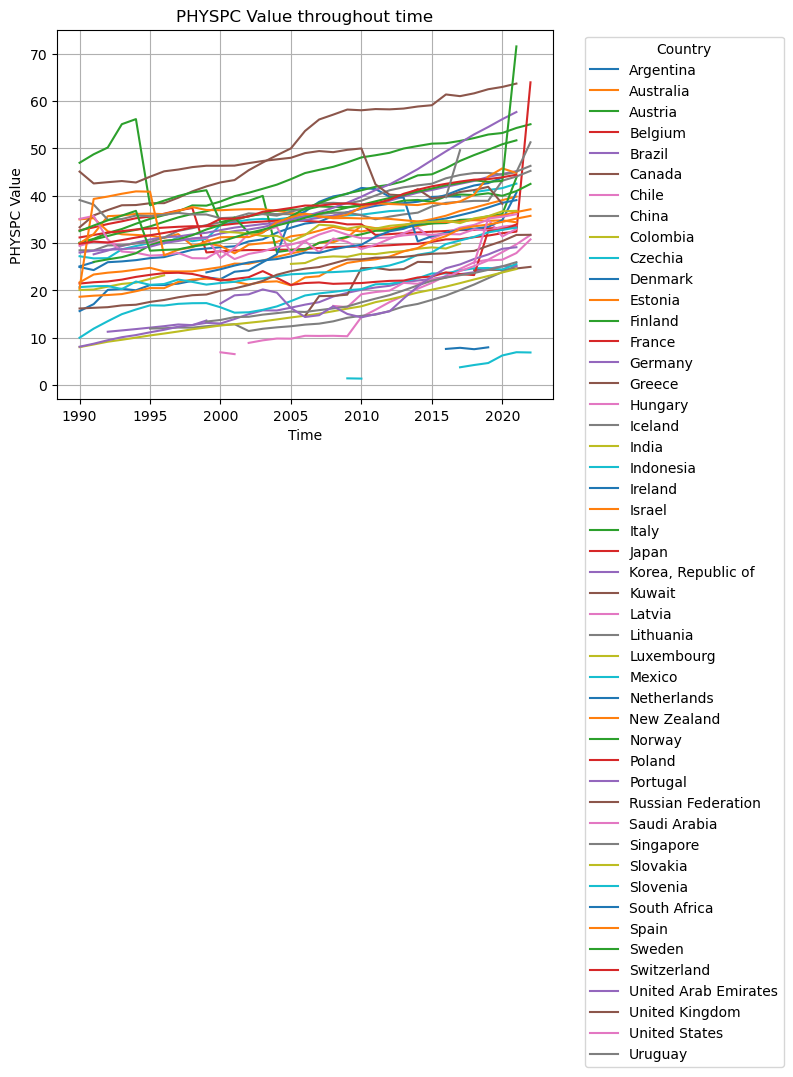

Countries in sspi_countries but not found in the DataFrame's index:
['Türkiye']


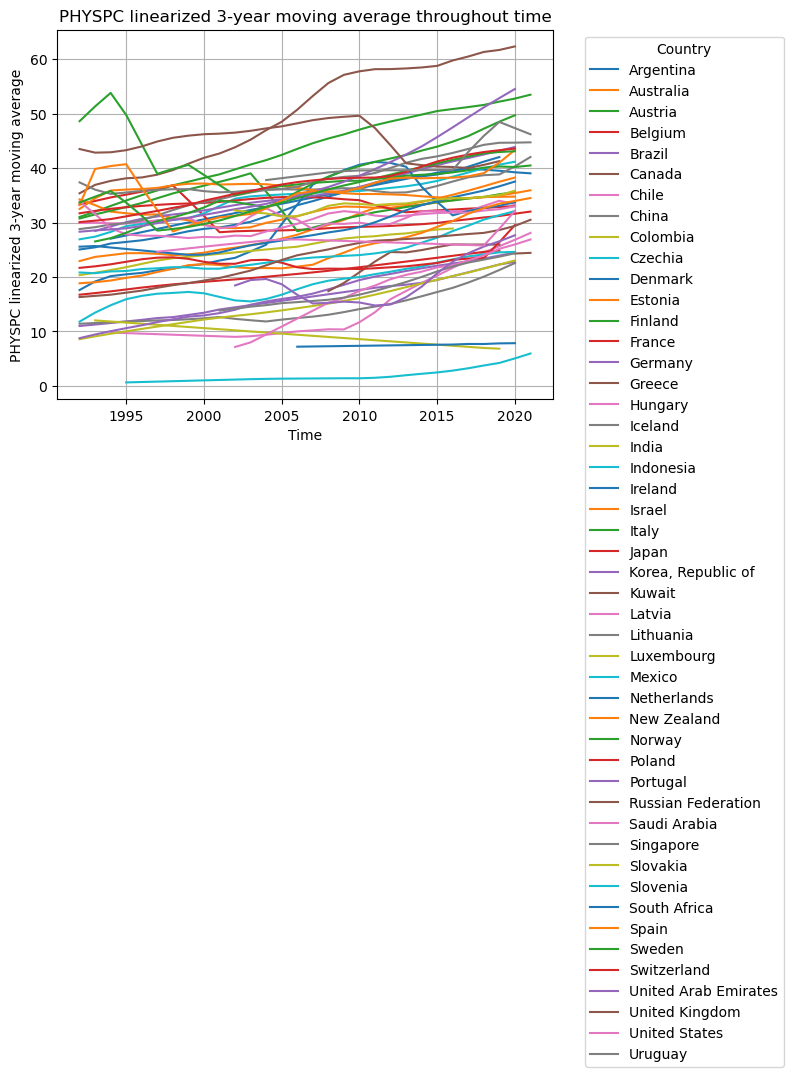

Countries in sspi_countries but not found in the DataFrame's index:
['Türkiye']


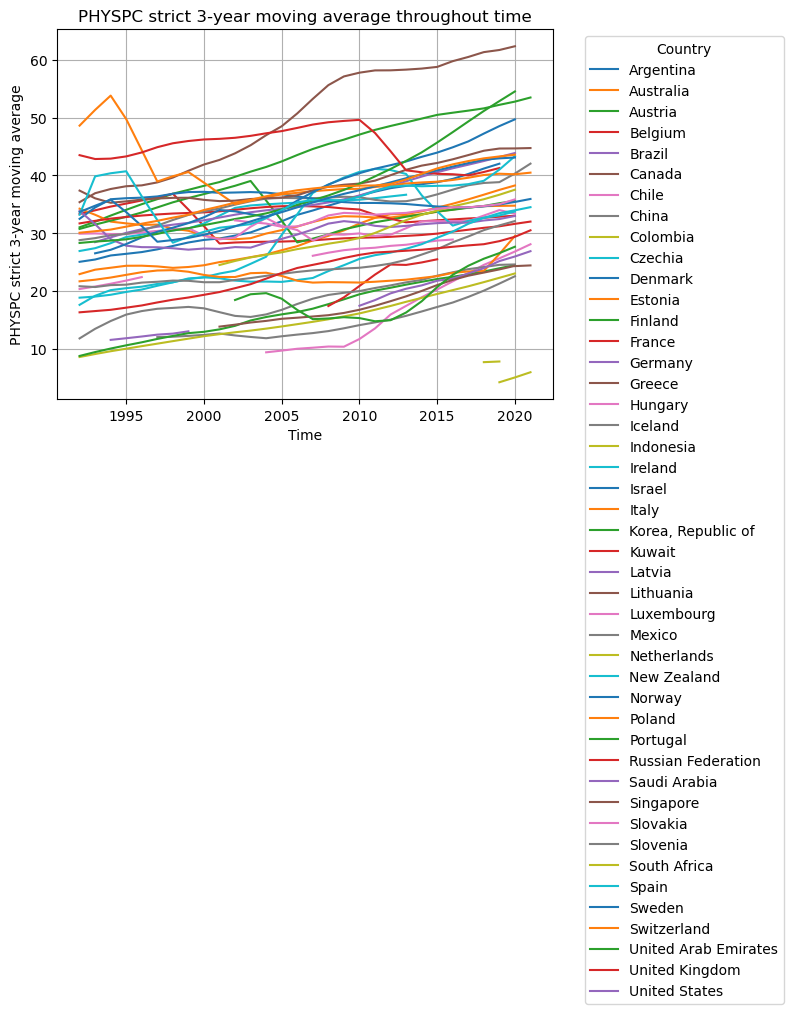

Countries in sspi_countries but not found in the DataFrame's index:
['India', 'Japan', 'Türkiye', 'Uruguay']


In [12]:
linearized_avg_df = moving_average(phys_sorted, 3, 3, linearized = True)
non_linearized_avg_df = moving_average(phys_sorted, 3, 3)
non_rolling_df = physicians
line_plot_adjusted(non_rolling_df, "PHYSPC", "Value")
line_plot_adjusted(linearized_avg_df, "PHYSPC", "linearized 3-year moving average")
line_plot_adjusted(non_linearized_avg_df, "PHYSPC", "strict 3-year moving average")
# top_10_adjusted(avg_df, "PHYSPC", "Value")
# bottom_10_adjusted(avg_df, "PHYSPC", "Value")
# line_plot_adjusted(strict_avg_df, "PHYSPC", "strict 3-year moving average")
# line_plot_adjusted(avg_df, "PHYSPC", "3-year moving average")
# top_10_adjusted(strict_avg_df, "PHYSPC", "strict 3-year moving average")
# bottom_10_adjusted(strict_avg_df, "PHYSPC", "strict 3-year moving average")

### Variance control visualization, SSPI countries only

Total variance: 893.6224741231227


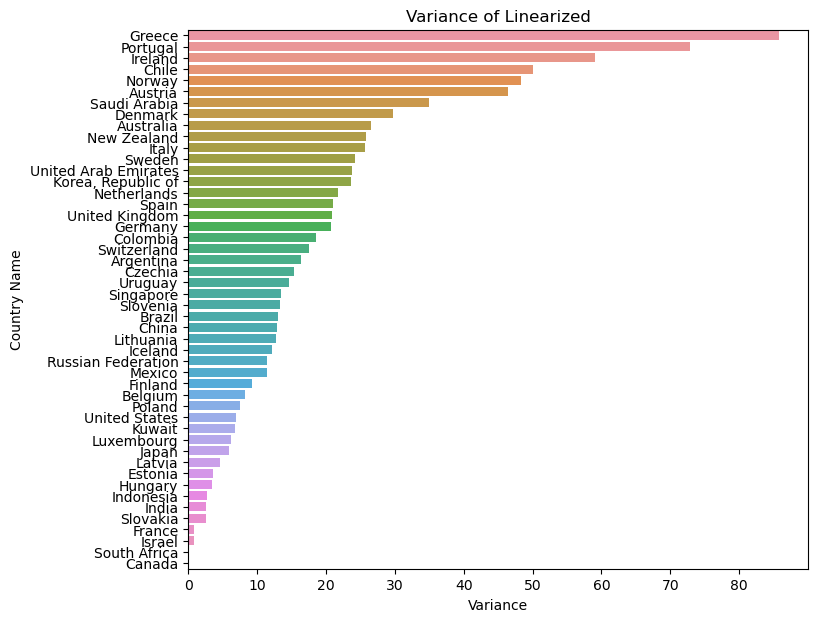

In [13]:
linearized_avg_df = moving_average(phys_sorted, 3, 3, linearized = True)
linearized_var = linearized_avg_df.groupby("CountryName").agg({"Value": np.var}).sort_values("Value", ascending = False).reset_index()
linearized_var = linearized_var[linearized_var["CountryName"].isin(sspi_countries)]
# subtract countries which were not included, if not for linearization
total_var = np.sum(linearized_var["Value"]) - (
    linearized_var.loc[linearized_var["CountryName"] == "Uruguay", "Value"].values[0]) - (
    linearized_var.loc[linearized_var["CountryName"] == "India", "Value"].values[0]) - (
    linearized_var.loc[linearized_var["CountryName"] == "Japan", "Value"].values[0])
print(f"Total variance: {total_var}")
plt.figure(figsize=(8,7))
var_plot = sns.barplot(linearized_var, y = "CountryName", x = "Value")
plt.xlabel("Variance")
plt.ylabel("Country Name")
plt.title("Variance of Linearized");

Total variance: 827.7387999310548


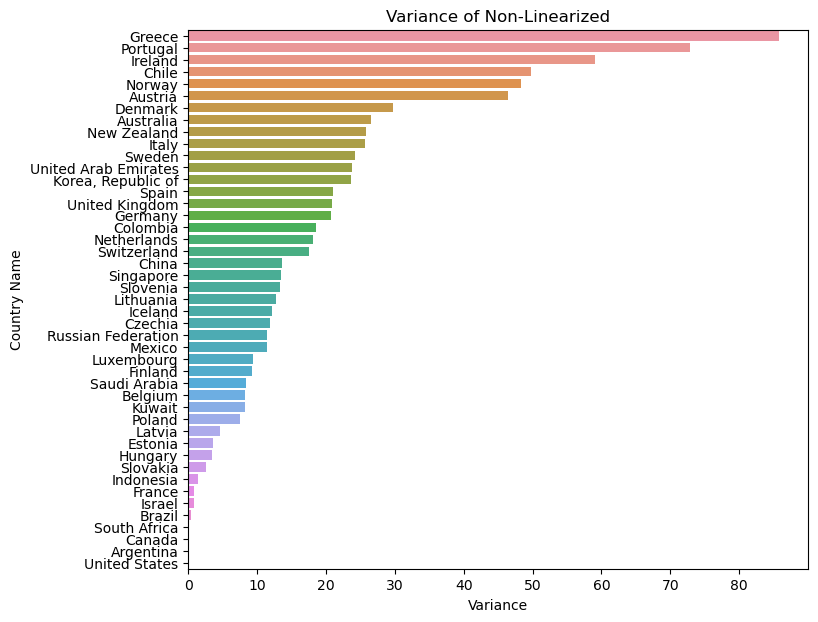

In [14]:
non_linearized_avg_df = moving_average(phys_sorted, 3, 3)
non_rolling_df = physicians
non_linearized_var = non_linearized_avg_df.groupby("CountryName").agg({"Value": np.var}).sort_values("Value", ascending = False).reset_index()
non_linearized_var = non_linearized_var[non_linearized_var["CountryName"].isin(sspi_countries)]
total_var = np.sum(non_linearized_var["Value"])
print(f"Total variance: {total_var}")
plt.figure(figsize=(8,7))
var_plot = sns.barplot(non_linearized_var, y = "CountryName", x = "Value")
plt.xlabel("Variance")
plt.ylabel("Country Name")
plt.title("Variance of Non-Linearized");

Total variance: 1220.600567546248


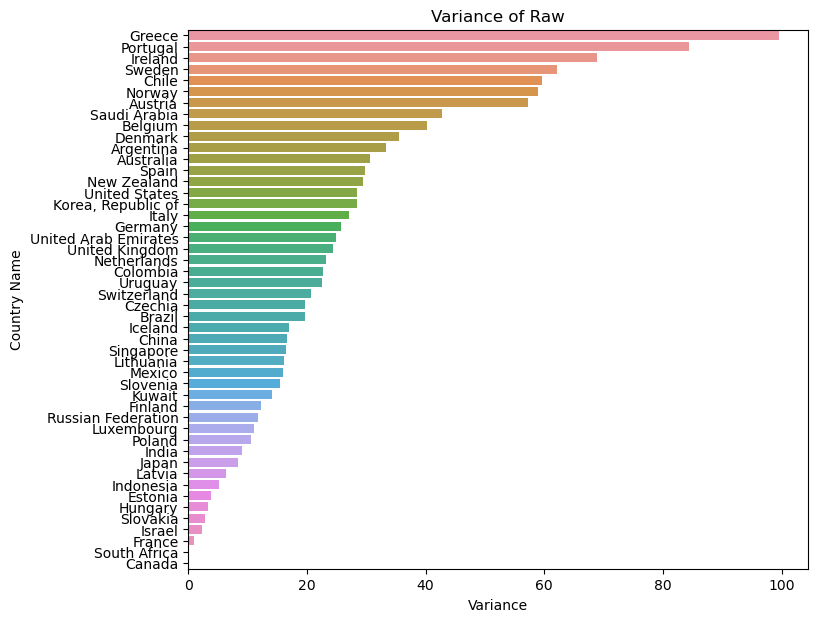

In [15]:
non_rolling_df = physicians
non_rolling_var = non_rolling_df.groupby("CountryName").agg({"Value": np.var}).sort_values("Value", ascending = False).reset_index()
non_rolling_var = non_rolling_var[non_rolling_var["CountryName"].isin(sspi_countries)]
total_var = np.sum(non_rolling_var["Value"])
print(f"Total variance: {total_var}")
plt.figure(figsize=(8,7))
var_plot = sns.barplot(non_rolling_var, y = "CountryName", x = "Value")
plt.xlabel("Variance")
plt.ylabel("Country Name")
plt.title("Variance of Raw");

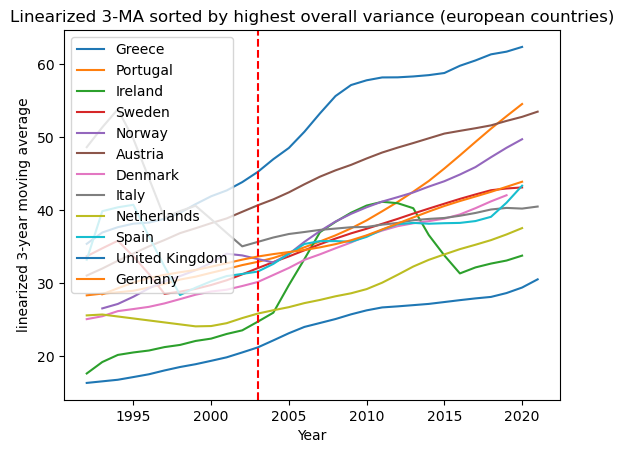

In [16]:
top_var = ["Greece", "Portugal", "Ireland", "Sweden", "Norway", "Austria", 
           "Denmark", "Italy", "Netherlands", "Spain", "United Kingdom", "Germany"]
top_var_countries = linearized_avg_df[linearized_avg_df["CountryName"].isin(
    top_var)]
top_var_countries
for country in top_var:
    filtered = top_var_countries[top_var_countries["CountryName"] == country]
    sns.lineplot(data = filtered, x = "Year", y = "linearized 3-year moving average", label = country)
plt.axvline(x = 2003, color = "red", linestyle = "dashed");
plt.title("Linearized 3-MA sorted by highest overall variance (european countries)");

### AIRPOL

In [17]:
airpol = pd.read_json("AIRPOL (1).json")
airpol

,CountryCode,Description,IndicatorCode,LowerGoalpost,Score,Unit,UpperGoalpost,Value,Year,_id
0,AFG,Annual mean levels of fine particulate matter ...,AIRPOL,40,0.000000,μg/m^3,0,83.12652,2010,{'$oid': '66941080b900e6618bc4e7c2'}
1,AFG,Annual mean levels of fine particulate matter ...,AIRPOL,40,0.000000,μg/m^3,0,77.75643,2016,{'$oid': '66941080b900e6618bc4e7c3'}
2,AFG,Annual mean levels of fine particulate matter ...,AIRPOL,40,0.000000,μg/m^3,0,87.33072,2013,{'$oid': '66941080b900e6618bc4e7c4'}
3,AFG,Annual mean levels of fine particulate matter ...,AIRPOL,40,0.000000,μg/m^3,0,75.18718,2019,{'$oid': '66941080b900e6618bc4e7c5'}
4,AFG,Annual mean levels of fine particulate matter ...,AIRPOL,40,0.000000,μg/m^3,0,82.36092,2014,{'$oid': '66941080b900e6618bc4e7c6'}
...,...,...,...,...,...,...,...,...,...,...
2315,ZWE,Annual mean levels of fine particulate matter ...,AIRPOL,40,0.634272,μg/m^3,0,14.62912,2015,{'$oid': '66941080b900e6618bc4f0cd'}
2316,ZWE,Annual mean levels of fine particulate matter ...,AIRPOL,40,0.633647,μg/m^3,0,14.65413,2011,{'$oid': '66941080b900e6618bc4f0ce'}
2317,ZWE,Annual mean levels of fine particulate matter ...,AIRPOL,40,0.633821,μg/m^3,0,14.64714,2012,{'$oid': '66941080b900e6618bc4f0cf'}
2318,ZWE,Annual mean levels of fine particulate matter ...,AIRPOL,40,0.636308,μg/m^3,0,14.54769,2017,{'$oid': '66941080b900e6618bc4f0d0'}


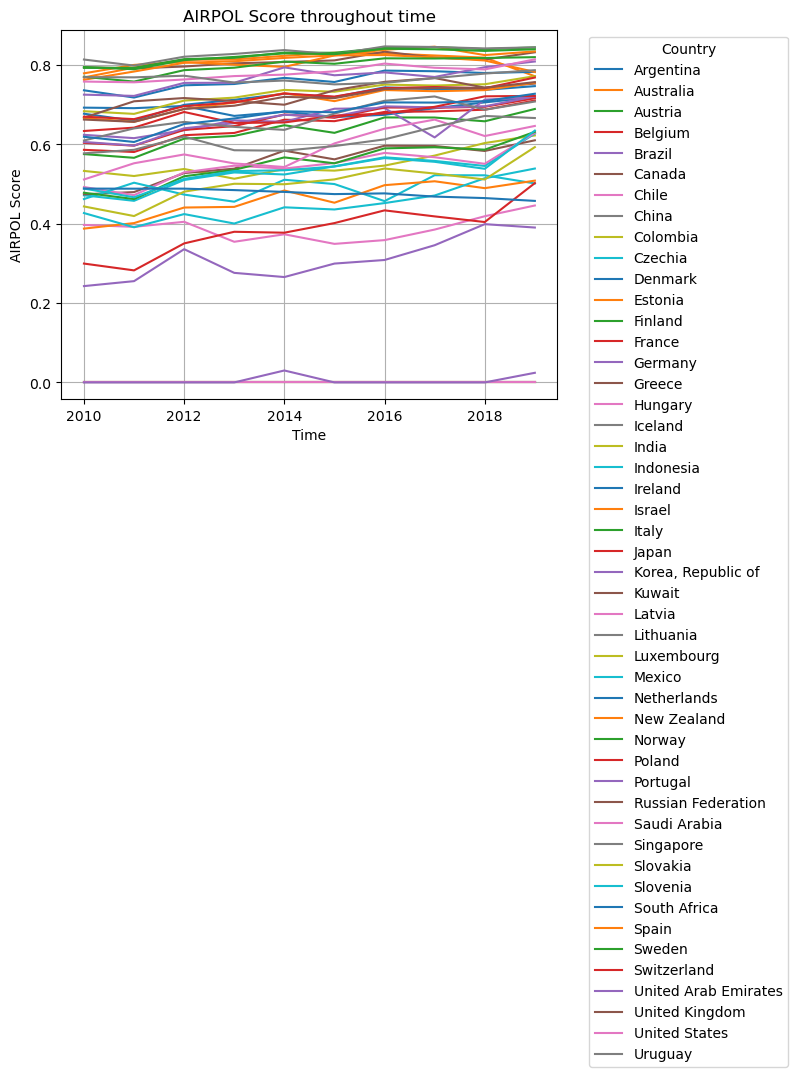

Countries in sspi_countries but not found in the DataFrame's index:
['Türkiye']


In [18]:
line_plot_adjusted(airpol, "AIRPOL", "Score")

### ALTNRG Goalposting

In [52]:
with open("ALTNRG.json") as file:
    altnrg = json.load(file)
df_list = []
for key in altnrg.keys():
    df = pd.DataFrame(altnrg[key])
    df["year dt"] = pd.to_datetime(df["Year"], format='%Y')
    df["normalized"] = (df["Value"] - np.min(df["Value"])) / (np.max(df["Value"]) - np.min(df["Value"]))
    df_list.append(df)
display(df_list[0].head(2), df_list[1].head(2), df_list[2].head(2), df_list[3].head(2))

,CountryCode,Description,IndicatorCode,IntermediateCode,Unit,Value,Year,year dt,normalized
0,HUN,Percentage of total final energy supply from r...,ALTNRG,BIOWAS,TJ,27486,1990,1990-01-01,0.003219
1,HKG,Percentage of total final energy supply from r...,ALTNRG,BIOWAS,TJ,462,1990,1990-01-01,0.000072


,CountryCode,Description,IndicatorCode,IntermediateCode,Unit,Value,Year,year dt,normalized
0,AUS,Percentage of total final energy supply from r...,ALTNRG,GEOPWR,TJ,3404,1990,1990-01-01,0.000604
1,AUT,Percentage of total final energy supply from r...,ALTNRG,GEOPWR,TJ,772,1990,1990-01-01,0.000137


,CountryCode,Description,IndicatorCode,IntermediateCode,Unit,Value,Year,year dt,normalized
0,HUN,Percentage of total final energy supply from r...,ALTNRG,HYDROP,TJ,640,1990,1990-01-01,0.000134
1,HND,Percentage of total final energy supply from r...,ALTNRG,HYDROP,TJ,8204,1990,1990-01-01,0.001724


,CountryCode,Description,IndicatorCode,IntermediateCode,Unit,Value,Year,year dt,normalized
0,ARG,Percentage of total final energy supply from r...,ALTNRG,NCLEAR,TJ,79429,1990,1990-01-01,0.008569
1,BEL,Percentage of total final energy supply from r...,ALTNRG,NCLEAR,TJ,466058,1990,1990-01-01,0.050597


{'BIOWAS': {'mean': 324491.3901837741,
  'sd': 932132.1725393292,
  'min': -153,
  'max': 8584801,
  'nor mean': 0.037815507244858174,
  'nor sd': 0.10857742191039453,
  'nor min': 0.0,
  'nor max': 1.0},
 'GEOPWR': {'mean': 60786.57232485186,
  'sd': 249478.09344923508,
  'min': 2,
  'max': 5631370,
  'nor mean': 0.010793926506818922,
  'nor sd': 0.0443015078128858,
  'nor min': 0.0,
  'nor max': 1.0},
 'HYDROP': {'mean': 90950.17600199154,
  'sd': 297250.52000044484,
  'min': 3,
  'max': 4758343,
  'nor mean': 0.019113215113252,
  'nor sd': 0.06246937377330011,
  'nor min': 0.0,
  'nor max': 1.0},
 'NCLEAR': {'mean': 908296.323,
  'sd': 1696076.5611781972,
  'min': 600,
  'max': 9199964,
  'nor mean': 0.09866946486735388,
  'nor sd': 0.18436889345591687,
  'nor min': 0.0,
  'nor max': 1.0}}

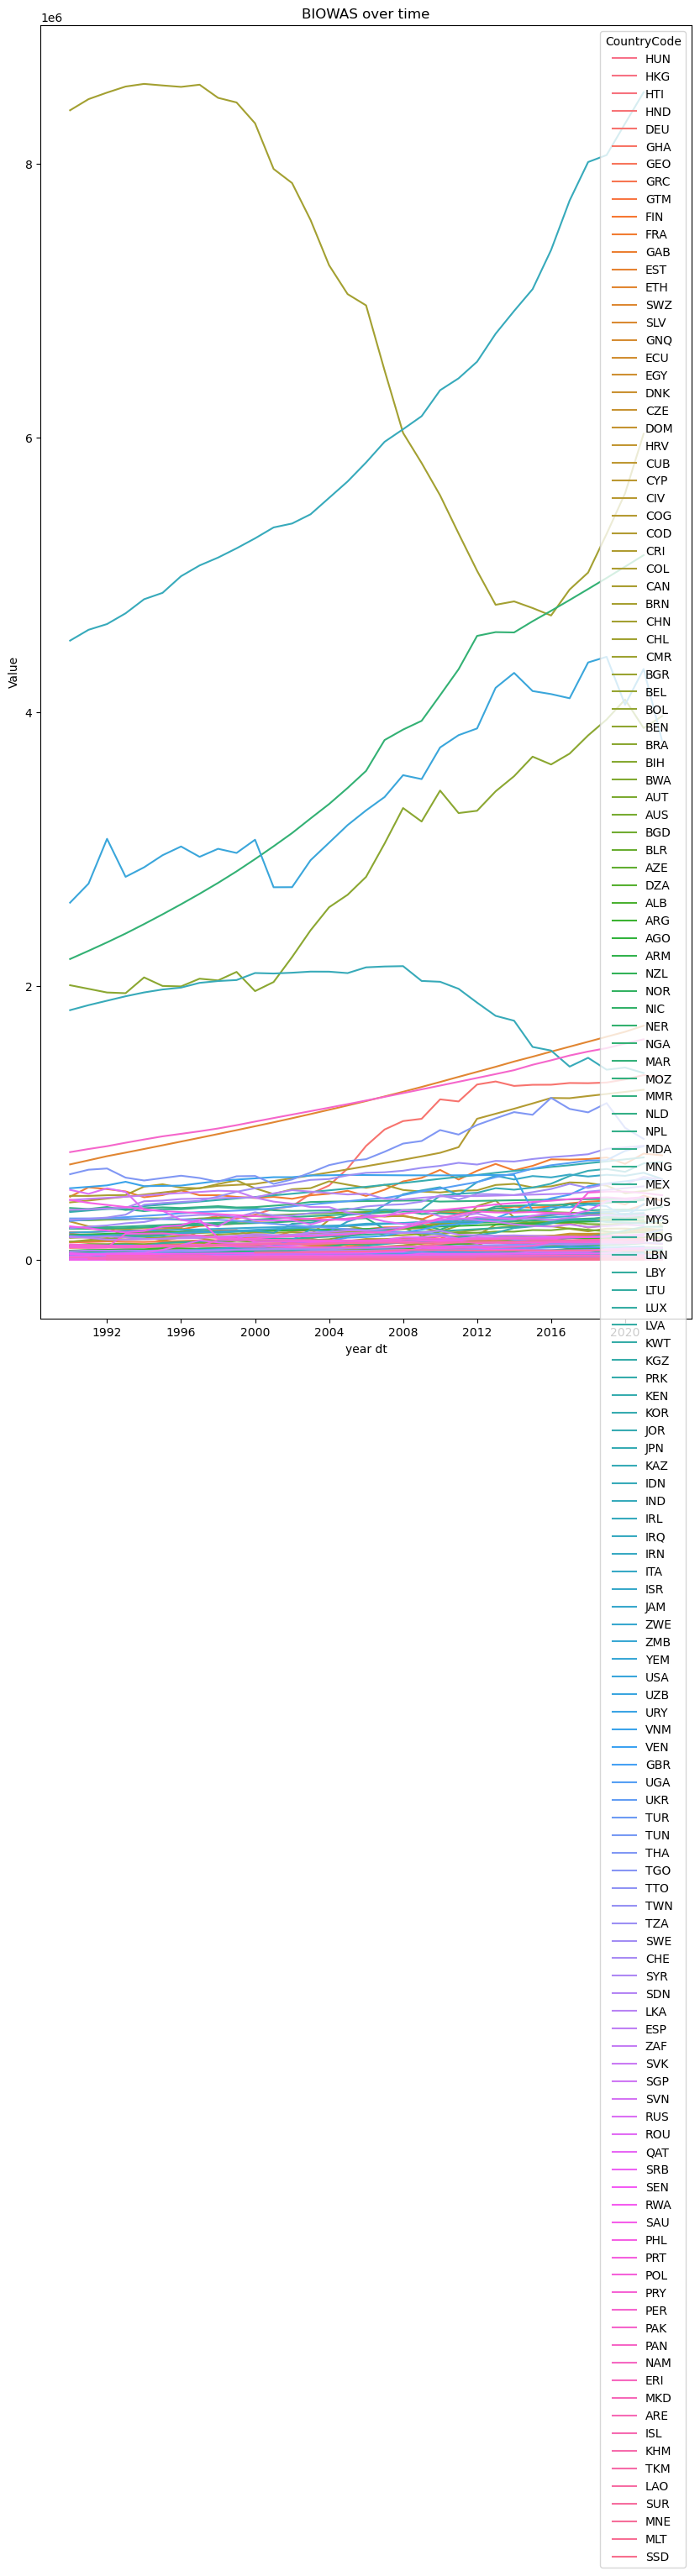

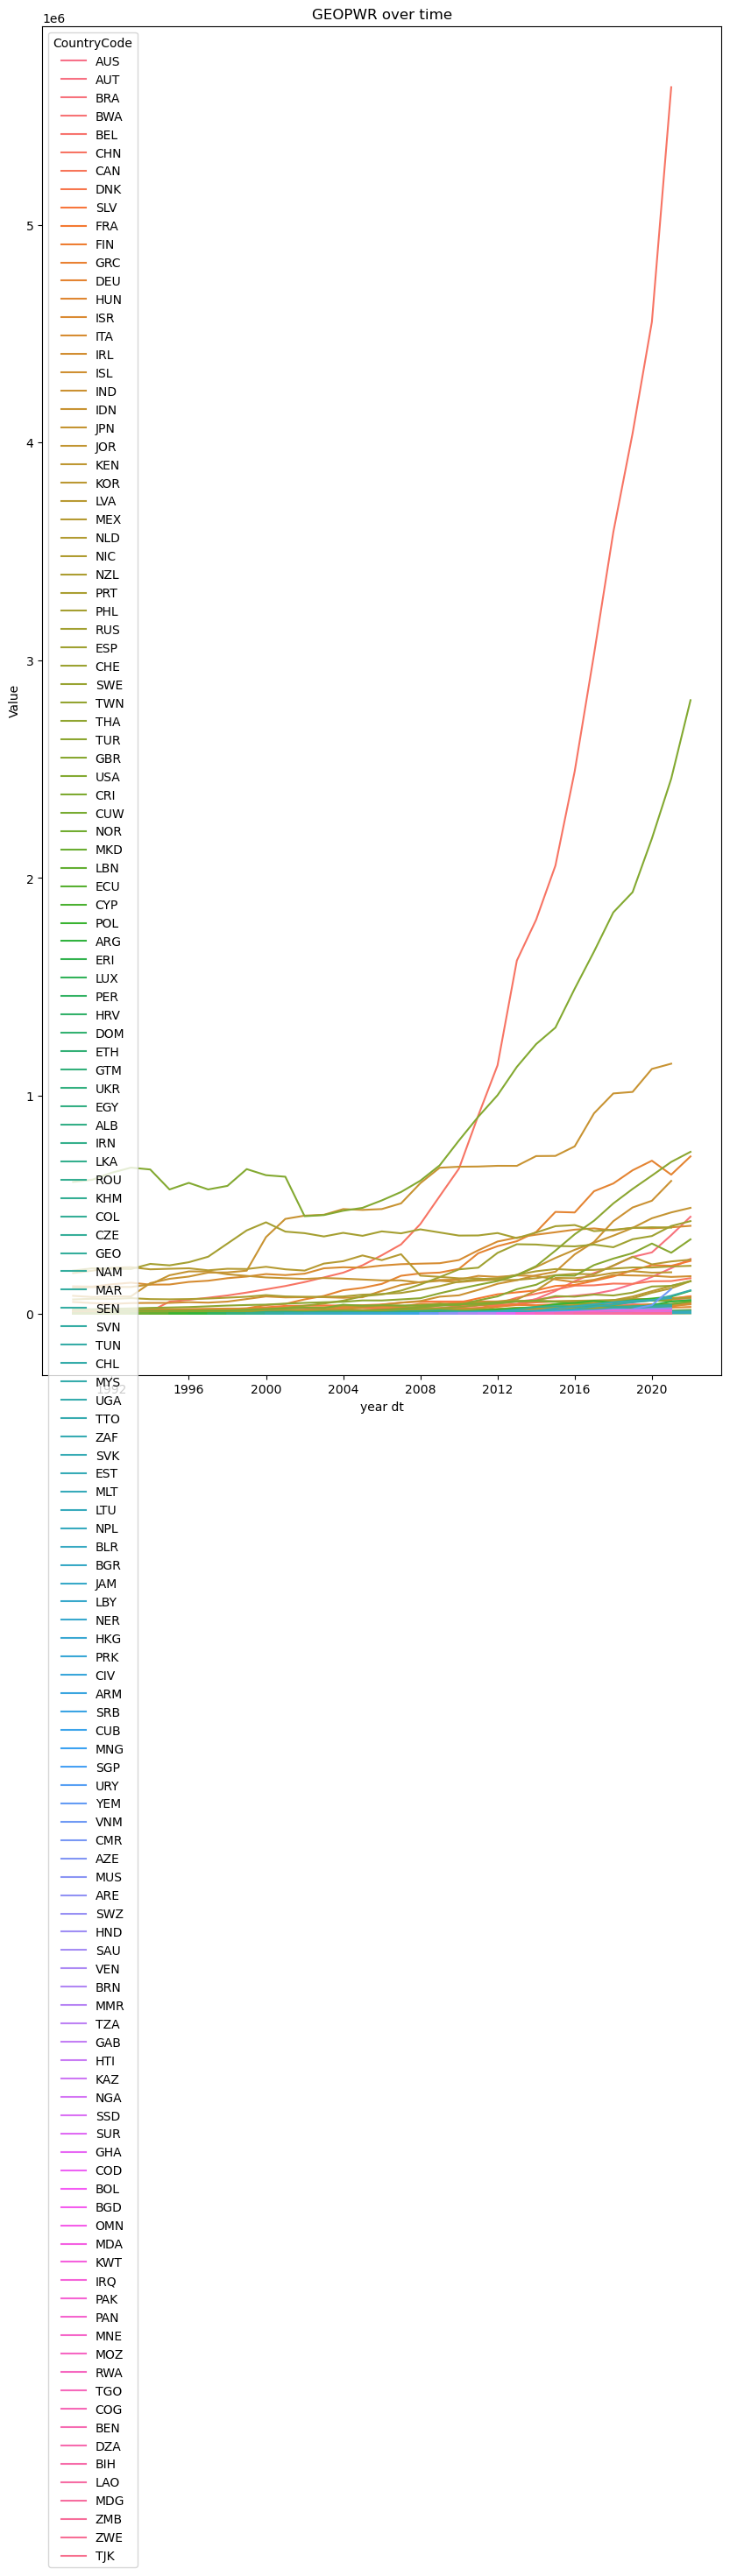

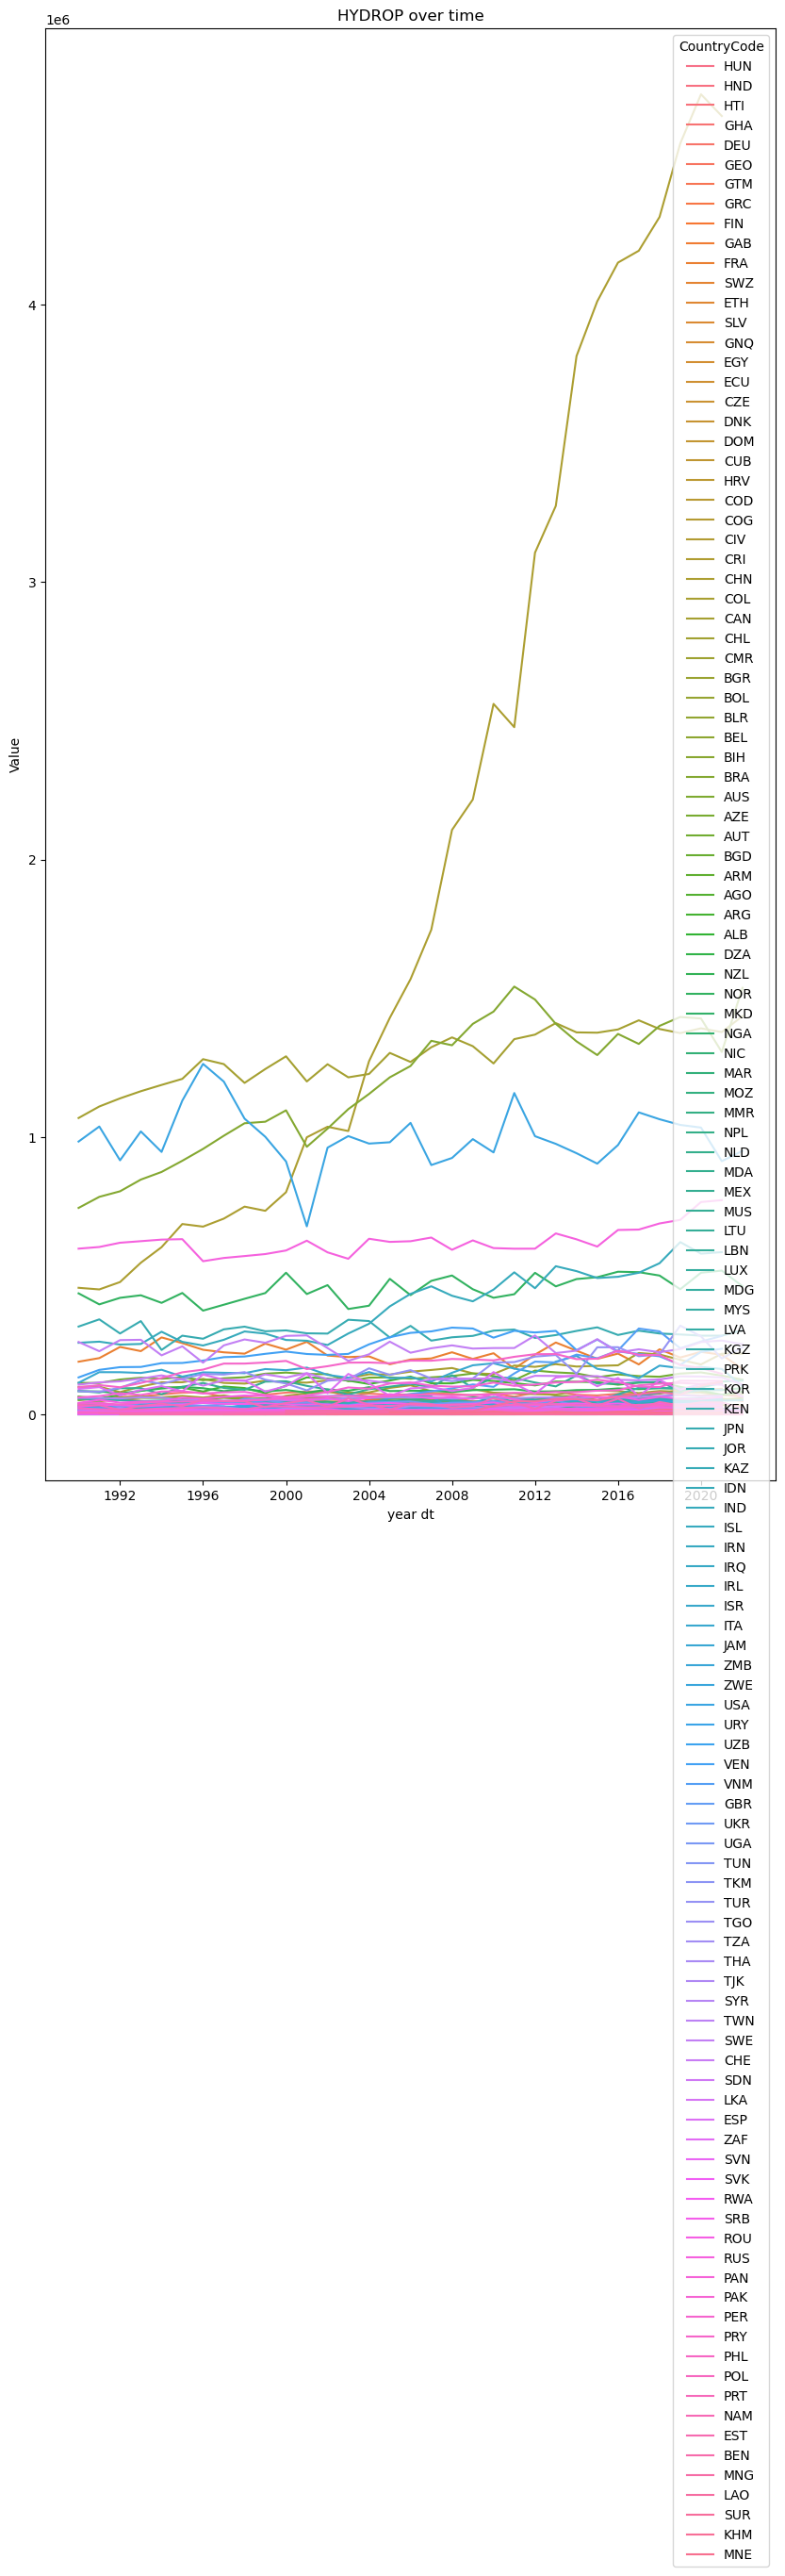

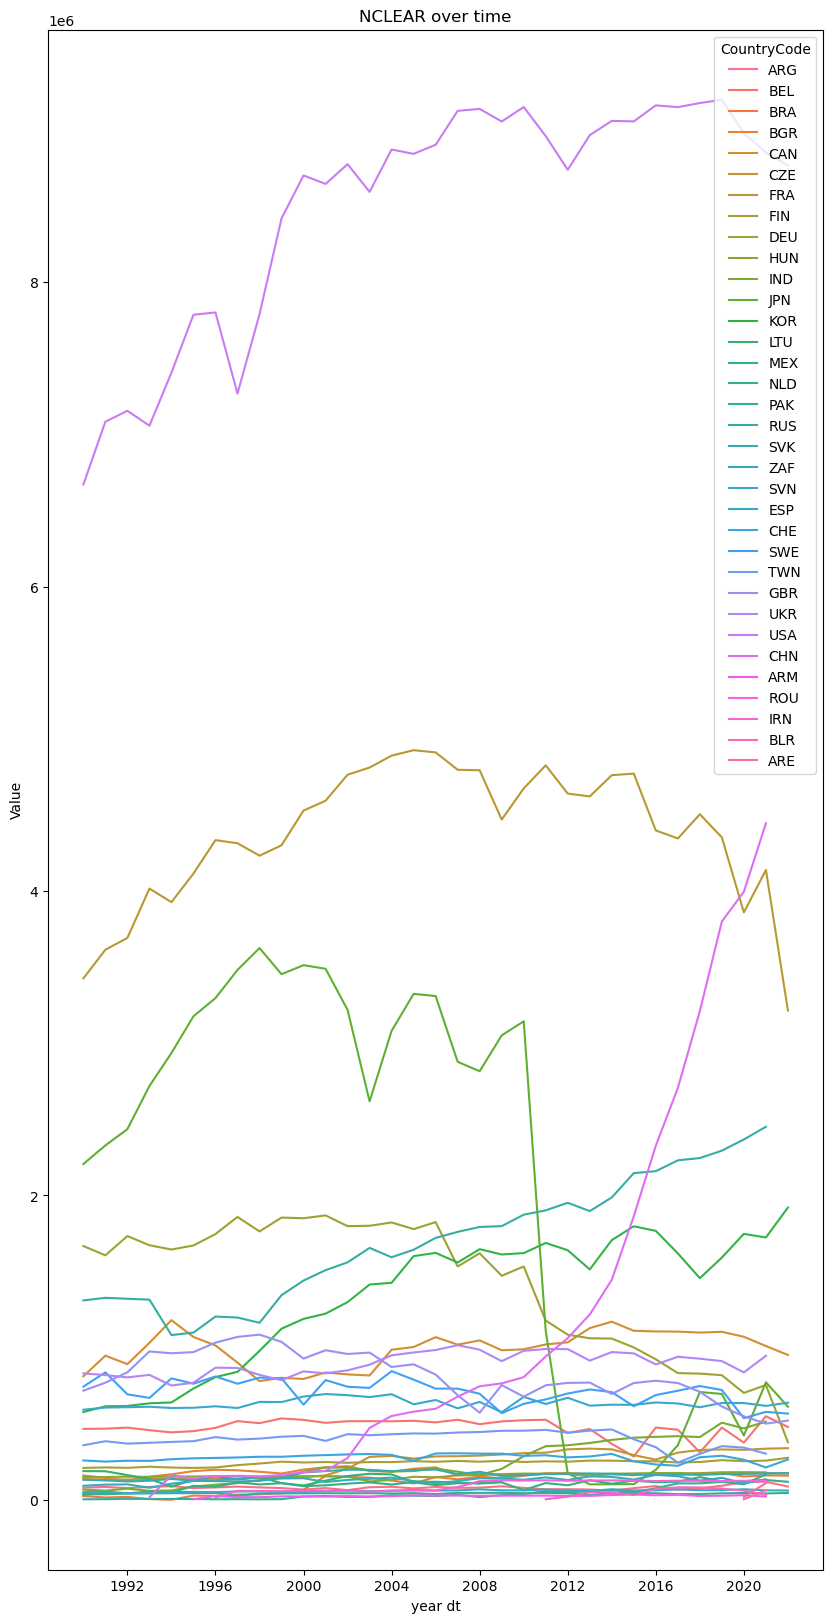

In [60]:
def inter_stats(df_list):
    dict = {}
    for df in df_list:
        inter = df["IntermediateCode"][0]
        dict[inter] = {}
        dict[inter]["mean"] = np.mean(df["Value"])
        dict[inter]["sd"] = np.std(df["Value"])
        dict[inter]["min"] = np.min(df["Value"])
        dict[inter]["max"] = np.max(df["Value"])
        dict[inter]["nor mean"] = np.mean(df["normalized"])
        dict[inter]["nor sd"] = np.std(df["normalized"])
        dict[inter]["nor min"] = np.min(df["normalized"])
        dict[inter]["nor max"] = np.max(df["normalized"])
    return dict
stats = inter_stats(df_list)
def plot_inter(df_list):
    for df in df_list:
        plt.figure(figsize = (10,20))
        sns.lineplot(data = df, x = "year dt", y = "Value", hue = "CountryCode")
        inter = df["IntermediateCode"][0]
        plt.title(f"{inter} over time")
display(stats)
plot_inter(df_list)